# **CIBA - PYTHON AVANZADO**

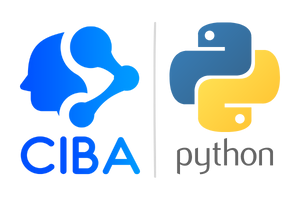


Contenido:
* Conocimientos Previos

# **1. INTRODUCCIÓN A DEEP LEARNING**

![Imagen](https://miro.medium.com/max/750/1*yfizqHNKUuL_RUOkQdzLBQ.jpeg)

## **Deep Learning vs Machine Learning**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


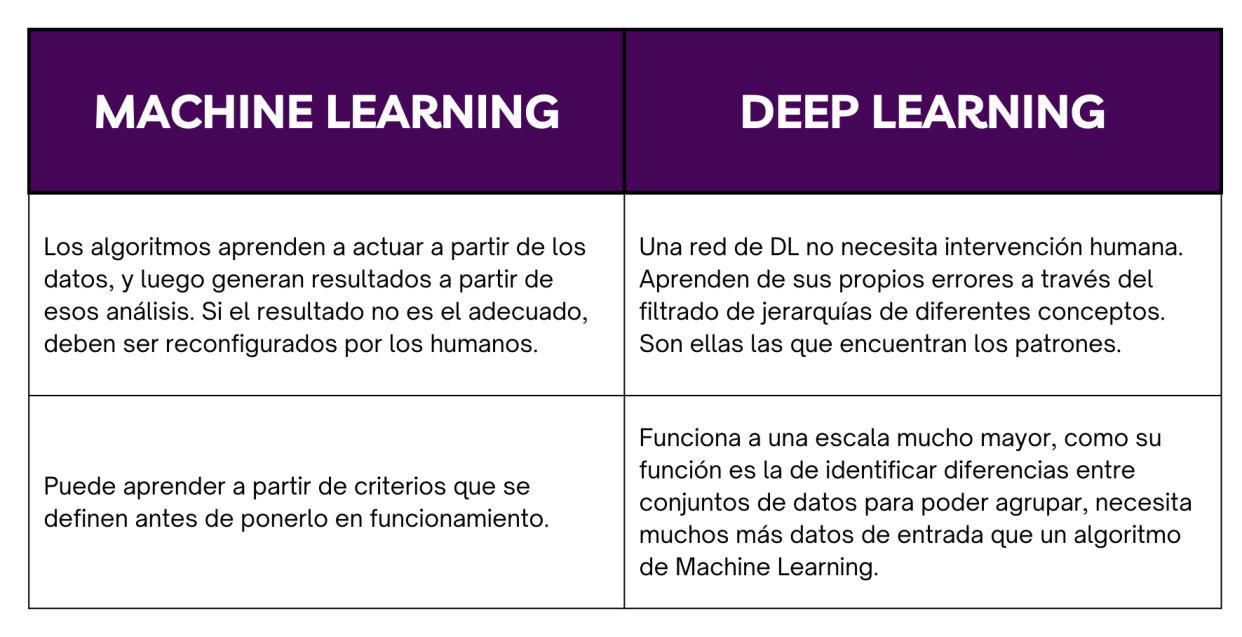

In [ ]:
ml_dl= cv2.imread("/content/drive/MyDrive/CLUBS DE APRENDIZAJE/CLUB PYTHON/PYTHON AVANZADO/Materiales Avanzado/ML-DL.png") # se carga la imagen 
ml_dl = cv2.cvtColor(ml_dl, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(22,12))
plt.axis('off')
plt.imshow(ml_dl)
plt.show()


## **Red Neuronal Artificial (ANN)  vs  Red Neuronal Convolucional (CNN)**

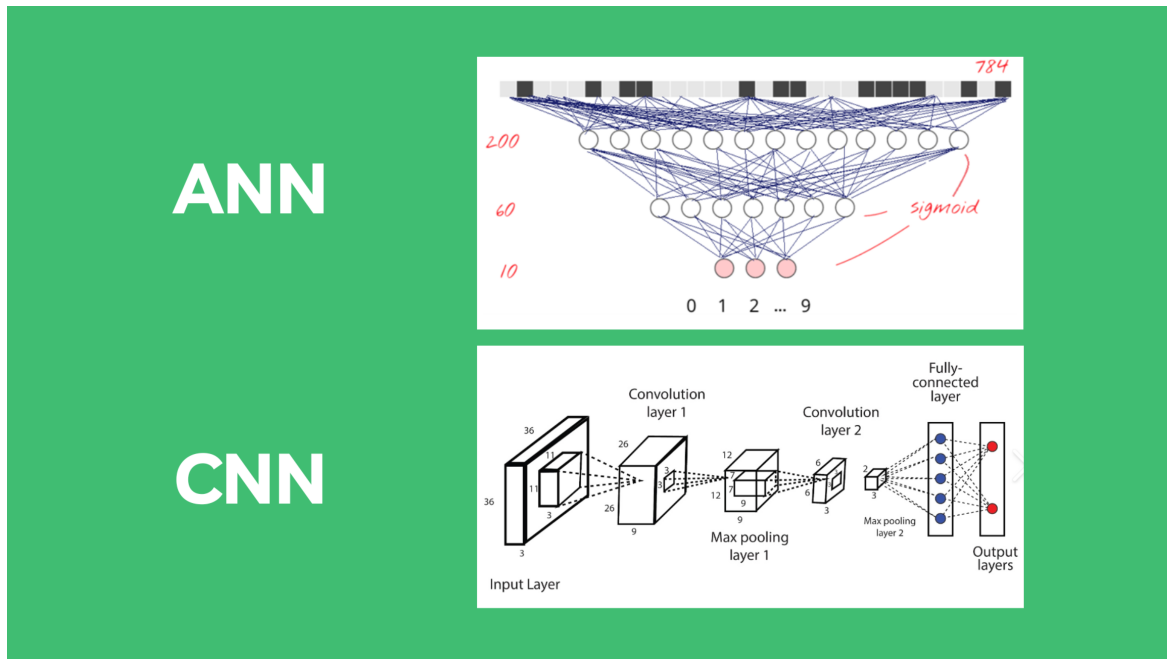

In [ ]:
ann_cnn= cv2.imread("/content/drive/MyDrive/CLUBS DE APRENDIZAJE/CLUB PYTHON/PYTHON AVANZADO/Materiales Avanzado/ANN-CNN.png") # se carga la imagen 
ann_cnn = cv2.cvtColor(ann_cnn, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(22,12))
plt.axis('off')
plt.imshow(ann_cnn)
plt.show()

## **1.1. EL PERCEPTRON**

**El operador AND**

---


 <img src="https://drive.google.com/uc?export=view&id=1PrC4no0FN_ITRlLIxGOIo7O278OWmxvj" alt="Simply Easy Learning" 
         height="400">


---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X1 = np.array([ 0, 0, 1, 1])
X2 = np.array([ 0, 1, 0, 1])
b = -1
print(X1)
print(X2)

[0 0 1 1]
[0 1 0 1]


In [ ]:
Y = X1*1 + X2*1 + b*1
print(Y)
res = Y > 0
Y[ res] = 1
Y[~res] = 0
print(Y)

[-1  0  0  1]
[0 0 0 1]


## **1.2. Funciones de activación**

 <img src="https://drive.google.com/uc?export=view&id=1o5ns81BNw2jjsHt1Bcy5BKXC2iCyPWdW" alt="Simply Easy Learning" 
         height="320">

### **1.2.1. SIGMOID**

In [ ]:
x = np.arange(-4,5)
sig = 1/ (1 + np.exp(-x))
print(sig)

[0.01798621 0.04742587 0.11920292 0.26894142 0.5        0.73105858
 0.88079708 0.95257413 0.98201379]


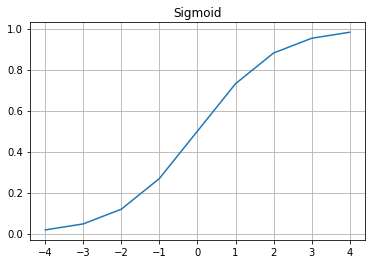

In [ ]:
plt.plot(x,sig)
plt.title("Sigmoid")
plt.grid()
plt.show()

### **1.2.2. TANH**

In [ ]:
x = np.arange(-4,5)
tan = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
print(tan)

[-0.9993293  -0.99505475 -0.96402758 -0.76159416  0.          0.76159416
  0.96402758  0.99505475  0.9993293 ]


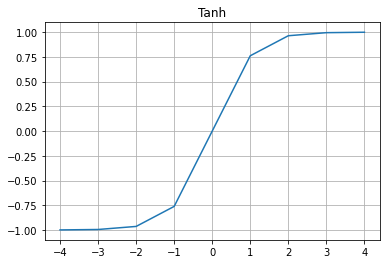

In [ ]:
plt.plot(x,tan)
plt.title("Tanh")
plt.grid()
plt.show()

### **1.2.3. RELU**

In [ ]:
x = np.arange(-4,5)
relu = np.maximum(0,x)
print(relu)

[0 0 0 0 0 1 2 3 4]


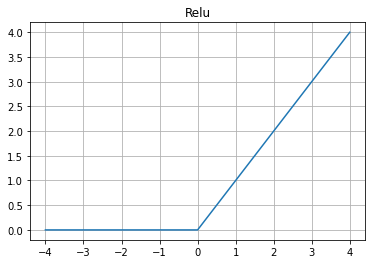

In [ ]:
plt.plot(x,relu)
plt.title("Relu")
plt.grid()
plt.show()

### **1.2.4. Comparación**

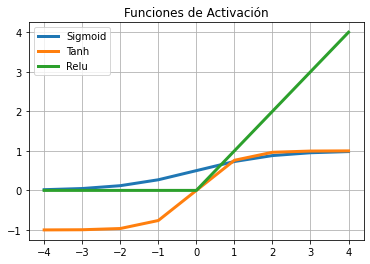

In [ ]:
plt.plot(x,sig, label="Sigmoid", linewidth=3)
plt.plot(x,tan, label="Tanh",linewidth=3)
plt.plot(x,relu, label="Relu",linewidth=3)
plt.title("Funciones de Activación")
plt.grid()
plt.legend()
plt.show()

## **1.3. Descenso del Gradiente**
Implementaremos el método de regresion lineal simple utilizando NumpPy 

<img src="https://drive.google.com/uc?export=view&id=1YTC-Fz1FYb2Q7dRWdTFXjA_BWPgfJmtR" alt="Simply Easy Learning" width="500" 
         height="200">

In [ ]:
import numpy as np    
import matplotlib.pyplot as plt 
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

* Para medir el error de nuestro Modelo, utilizamos el Error cuadratico médio: 

 $rmse = \sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - p_{i})^{2}}$

<img src="https://iartificial.net/wp-content/uploads/2018/12/error-regresion-lineal2.png" alt="Simply Easy Learning" width="300" 
         height="200">

In [ ]:
def RMSE(y_true, y_pred):
  rmse = np.sqrt(np.sum((y_true - y_pred)**2)/y_true.size)
  return rmse

Exploremos el descenso del gradiente:

 <img src="https://miro.medium.com/max/694/1*7030GXGlVD-u9VyqVJdTyw.png" alt="Simply Easy Learning" width="500" height="250">

Veamos mejor este ejemplo de una forma animada:
[An Interactive Tutorial on Numerical Optimization](http://www.benfrederickson.com/numerical-optimization/)


 <img src="https://developers.google.com/machine-learning/crash-course/images/GradientDescentNegativeGradient.svg?hl=es-419" alt="Simply Easy Learning" width="400">


  <img src="https://developers.google.com/machine-learning/glossary/images/nonconvex_function.svg?hl=es" alt="Simply Easy Learning" width="280">

**RESOLVAMOS EL PROBLEMA  CON LA BASE BOSTON**

Recordemos la ecuación de una recta:

$Y=W_0+W_1X$

Las derivadas parciales son:

$W_0=W_0-\alpha \frac{\partial }{\partial W_0}e(W_0,W_1)$ 

$W_1=W_1-\alpha \frac{\partial }{\partial W_1}e(W_0,W_1)$

Resolviendo:

$W_0=W_0-\alpha \frac{1}{m}\sum_{i=1}^{m}(h(x^{i})-y^{i})$


$W_1=W_1-\alpha \frac{1}{m}\sum_{i=1}^{m}((h(x^{i})-y^{i})x^{i})$


In [ ]:
def gradient_descent(X, y, w0, w1, lr, epocas):
  m = y.size
  hist_error = []
  for epoch in range(epocas):
    h = w0 + w1*X # 
    hist_error.append(RMSE(y, h))
    w0_derv =  np.sum(h - y)
    w1_derv =  np.sum((h- y)*X)
    w0 = w0 - (w0_derv/m) * lr
    w1 = w1 - (w1_derv/m) * lr
  return w0, w1, hist_error

w0:-14.908205118003961, w1:5.9953570504093445


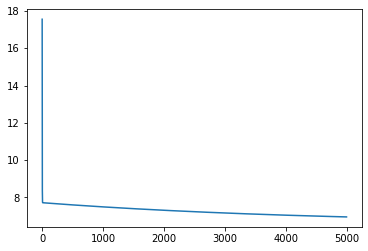

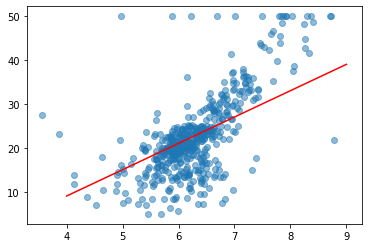

In [ ]:
w0 = 1
w1 = 1
lr = 0.01  #potencias de 10 ** -3/-2
epocas = 5000
X = np.array(boston.data[:,5])
y = np.array(boston.target)
w0, w1, hist = gradient_descent(X, y, w0, w1, lr, epocas)
print(f"w0:{w0}, w1:{w1}")
plt.plot(hist)
plt.show()
plt.scatter(X, y, alpha = 0.5)
plt.plot([4,9], [w0+w1*4, w0 + w1*9], "r")
plt.show()

# **2. CASO DE USO**

**Importando librerias**

In [ ]:
import torch
from torchvision import datasets   # Para importar data. 
from torchvision.transforms import ToTensor # Escalas para el pixel de [0,1] o [-1,1].
import matplotlib.pyplot as plt  #Gráficos.
from torch.utils.data import DataLoader  #Cargadores.
import torch.nn as nn #Para las redes neuronales.
from torch.autograd import Variable #Para calibrar los gradientes del modelo.
import random # Para la semilla

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu" )
device #Conecta a python, a través de pytorch con la gpu de la computadora.
# (gasto computacional)

device(type='cuda')

**Carga del dataset**

**Descripción del conjunto de datos**

Se utilizó el conjunto de datos
“MNIST” (Modified National Institute of Standards and Technology), este es un dataset que contiene 60’ 000 imágenes de entrenamiento y
10’ 000 de prueba, todas con un tamaño fijo,las imágenes contienen números enteros manuscritos
entre 0 y 9, los cuales fueron escritos por 250 personas diferentes,
entre estudiantes de secundaria y empleados de la oficina del Censo de
los Estados Unidos.
La red neuronal que construiremos clasifica estos dígitos scritos a mano en sus 10 clases (0, .., 9). Lo hace en
base a parámetros internos que deben tener un valor correcto para que la
clasificación funcione bien. Este “valor correcto” se aprende a través de un
proceso de entrenamiento que requiere un “conjuntos de datos
etiquetados” con imágenes y las respuestas asociadas.
A medida que avanza el entrenamiento, un lote de datos de
entrenamiento a la vez, los parámetros internos del modelo se actualizan
y el modelo mejora cada vez más en el reconocimiento de los dígitos
escritos a mano.


 <img src="https://codelabs.developers.google.com/static/codelabs/cloud-tensorflow-mnist/img/ad83f98e56054737.png" alt="Simply Easy Learning" 
         width="2000">

In [ ]:
train_data = datasets.MNIST(
    root="data", #Crea una carpeta con el nombre data en la nube.
    train = True, #¿Los datos son para entrenamiento del modelo? TRUE.
    transform = ToTensor(), # ToTensor() convierte una imagen en el rango de [0:255] a un rango de [0:1].
    download= True # Descarga la data, en caso no se encuentre descargado en la nube.
)

test_data = datasets.MNIST(
    root="data",
    train = False, # ¿Los datos son para entrenamiento del modelo? FALSE, ya que serán nuestros datos de prueba.
    transform = ToTensor() #¿Desea aplicar alguna transformación Torchvision a las imagenes? # convierte una imagen PIL en un tensor.
)
# La descarga de las imagenes se dan en archivo divice (codigo binario) y la descarga se hace por una única vez. 

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



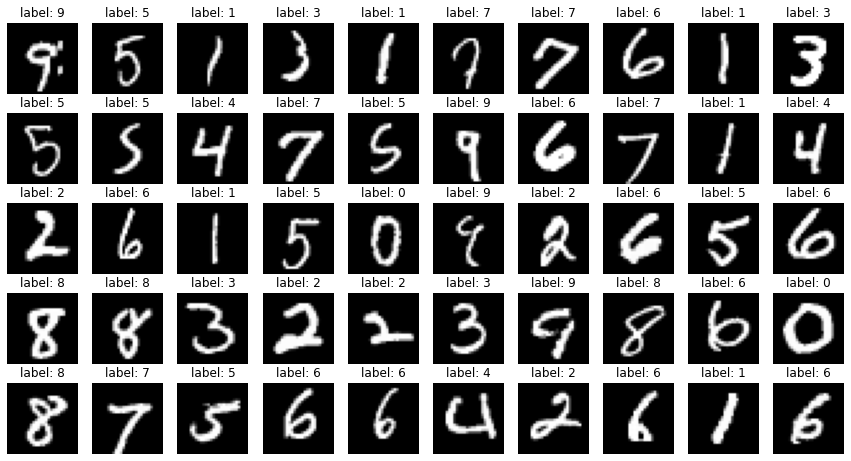

In [ ]:
fig = plt.figure(figsize=(15,8))  #Tamaño de la salida, como una sola imagen  # figsize=(largo, ancho).
c = 10 # n° de columnas. 
r = 5 # n° de filas. 
for i in range(1,c*r + 1): # range(1:56) # i toma valores del 1 al 55
  idx = torch.randint(len(train_data), size=(1,)).item() #Escoge uno de los tensores de forma aleatorias de las 60000 que hay.
  img, label = train_data[idx] #Almacena la imagen aleatoria convertida en tensor.
  fig.add_subplot(r,c,i) #Divide el espacio de la imagen con dimensiones asignadas en r filas y c columnas, creando r*c espacios para cada imagen.
  plt.title(f"label: {label}") #Título para cada imagen.
  plt.axis("off") #Valores de los ejes de cada imagen.
  plt.imshow(img.squeeze(), cmap="gray") #Aqui se manda la imagen IMSHOW #Muestra la imagen en el espacio en una escala de grises
plt.show()
 

In [ ]:
loaders = { # Cargadores que se van a utilizar dentro de pytoch en el modelo.
    "train": DataLoader( # Cargador de entrenamiento. 
        train_data,  # Data usar de entrenamiento.
        batch_size = 100, # La cantidad de tensores por cargar por cada lote que va a cargar.
        # se va a cargar las imagenes de 100 en 100 para poder hacer el entrenamiento
        shuffle = True, # Los datos se escogen aleatoriamente para cada lote a cargar.
        num_workers = 2
    ),
    "test": DataLoader( 
        test_data, # Data a usar de prueba
        batch_size = 100, # Para que el dataset se descargue por bloques o batch, sino se satura la memoria.
        shuffle = True,
        num_workers=2  # Representa cuántos subprocesos o épocas a usar para cargar datos. 
    )
} # loaders es un diccionario que almacena dos caragadores, tanto de entrenamiento como de prueba

## **MODELOS ANN**

**Definiendo funciones de entrenamiento y pruebas**

In [ ]:
def train_data(num_epochs, model, loaders): # nro de epocas, modelo, los cargadores de datos
  model.train() # cargador de entrenamiento (fase de entrenamiento)
  t_steps = len(loaders["train"]) # cantidad de "batch" que hay
  errors  = []
  
  for epoch in range(num_epochs): # numero de epocas que se quieres mandar a entrenar
    errs = 0 # se tiene un error por cada "batch", se busca el promedio de estos para tener un error general
    for i ,(images,labels) in enumerate(loaders["train"]): # 1. Se lee cada uno de los grupos, batch1, batch2, etc
      images = Variable(images.view(-1,28*28)).to(device) # imagenes bidimensional (28x28) a vector unidemensional 728 pixeles (Se aplanan)
      labels = Variable(labels).to(device)
      outputs = model(images) # se esta envíando al modelo a que haga la predicción (el Y)
      loss = loss_func(outputs, labels) # calcula el error que existe entre las salidas y etiquetas
      optimizer.zero_grad() # optimizador SGD
      loss.backward() # la parte del backpropagation
      optimizer.step() # ajuste de los pesos (disminuir el error, descenso de gradiente)
      errs +=loss.item() # calcula el promedio de los errores de batch de la 1er epoca   
      if (i+1) % 100 == 0:
        print(f"epoch {epoch+1}/{num_epochs}: step:{i+1}/{t_steps}, Loss:{loss.item():.4f}") # cada 100 muestra el resultado, 
    errors.append(errs/t_steps) # en la lista de errors se tiene el promedio de los errores para cada epoca 
  plt.plot(errors) # una vez que se entrene lo anterior, se grafica para visualizar los resultados
  plt.title("Gráfica del error")
  plt.xlabel("Epoca")
  plt.ylabel("Error")
  plt.grid()
  plt.show()
  return model

In [ ]:
def test_model(model): # Para la prueba de entrenamiento 
  model.eval() # Se pone el "modelo" en un modo de evaluación
  with torch.no_grad():
    correct = 0 # para almacenar las predicciones correctas
    #total = 0
    for images, labels in loaders["test"]:
       images = images.view(-1,28*28).to(device)#images.to(device)
       labels = labels.to(device) # se enviaba los lavels a la GPU
       test_out = model(images)
       y_pred = torch.max(test_out, 1)[1].data.squeeze() # se ecuentra la predicción que da el modelo
       accuracy = (y_pred==labels).sum().item() / labels.size(0) #buenas clasificaciones/ total de muestras del dataset
    print(f"Accuracy en test : {accuracy}") 

**Configurando Hiperparámetros**

In [ ]:
input_size  = 784 # img_size = (28,28) ---> 28*28=784 en total
hidden_size = 500 # número de capas ocultas
num_classes = 10 # digitos del [0,9], numero de clases pq son digitos del 0 al 9
num_epochs = 10 # numero de épocas
batch_size = 100 # tamaño del batch
lr = 1e-3 # Learning rate (0.001)

## **2.1. Modelo inicial (ANN1)**
 **Una red simple**
 
 <img src="https://codelabs.developers.google.com/static/codelabs/cloud-tensorflow-mnist/img/e218e6eee9da4e.png" alt="Simply Easy Learning" 
         width="500">

Ahora se empieza a entrenar:

In [ ]:
class net_ANN(nn.Module):
  def __init__(self, input_size, num_classes): # constructor (Cantidad de hiperparametros)
    super(net_ANN, self).__init__()
    
    self.fc1 = nn.Linear(input_size, num_classes) # 1 capa tipo linear, 
    # que recive como entrada 724 pixeles y cuya sálida es el número de 
    # clases-> de neuronas 
  
  def forward(self,x):
    out = self.fc1(x) # Aqui se aplica la función a x
    return out

In [ ]:
model_ann = net_ANN(input_size, num_classes) # se crea el objeto y se manda los hiperparametros
print(model_ann) # modelo
model_ann.to(device) # se envía a la GPU
loss_func = nn.CrossEntropyLoss() # Nos va a medir el error -> entropía cruzada
optimizer = torch.optim.SGD(model_ann.parameters(), lr=lr) # Descenso de gradiente estocastico, se encarga de poder realizar ajustes de los batches (optimizar
# los parametros de la red)
# Buscar tutorial del SGD


# A los pesos se les conoce como parameters, kernels, filtros

net_ANN(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


epoch 1/10: step:100/600, Loss:2.2065
epoch 1/10: step:200/600, Loss:2.0865
epoch 1/10: step:300/600, Loss:2.0112
epoch 1/10: step:400/600, Loss:1.9746
epoch 1/10: step:500/600, Loss:1.9004
epoch 1/10: step:600/600, Loss:1.8034
epoch 2/10: step:100/600, Loss:1.6764
epoch 2/10: step:200/600, Loss:1.6246
epoch 2/10: step:300/600, Loss:1.6712
epoch 2/10: step:400/600, Loss:1.5571
epoch 2/10: step:500/600, Loss:1.5785
epoch 2/10: step:600/600, Loss:1.4256
epoch 3/10: step:100/600, Loss:1.3931
epoch 3/10: step:200/600, Loss:1.4564
epoch 3/10: step:300/600, Loss:1.4511
epoch 3/10: step:400/600, Loss:1.3776
epoch 3/10: step:500/600, Loss:1.2622
epoch 3/10: step:600/600, Loss:1.3504
epoch 4/10: step:100/600, Loss:1.2991
epoch 4/10: step:200/600, Loss:1.2223
epoch 4/10: step:300/600, Loss:1.1985
epoch 4/10: step:400/600, Loss:1.1873
epoch 4/10: step:500/600, Loss:1.2432
epoch 4/10: step:600/600, Loss:1.0940
epoch 5/10: step:100/600, Loss:1.0447
epoch 5/10: step:200/600, Loss:1.1447
epoch 5/10: 

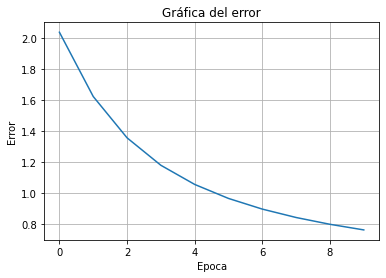

In [ ]:
random.seed(2023)
model_ann = train_data(num_epochs, model_ann, loaders) # cada step (La epoca 1 se ha dividido en 6 partes)
# El loss final en el grafico en 10 epocas 

In [ ]:
test_model(model_ann) 

Accuracy en test : 0.83


#### ¿ Hay más arquitecutras?
![Imagen](https://abdatum.com/media/images/red-neuronal-multicapa.jpeg)

**Funciones de Activacion**
La función de activación se encarga de devolver una salida a partir de un valor de entrada.

- Sigmoide:

![Imagen](https://ml4a.github.io/images/figures/sigmoid.png)

- ReLU – Rectified Lineal Unit:

![Imagen](https://www.diegocalvo.es/wp-content/uploads/2018/12/funci%C3%B3n-ReLU.png)

- Softmax:

La función Softmax transforma las salidas a una representación en forma de probabilidades, de tal manera que el sumatorio de todas las probabilidades de las salidas de 1.

![Imagen](https://numerentur.org/wp-content/uploads/2018/07/funcion-softmax.png)

## **2.2. Agregando capas (ANN2)**

In [ ]:
class net_ANN2(nn.Module):
  def __init__(self, input_size, num_classes):
    super(net_ANN2, self).__init__()
    self.fc1 = nn.Linear(input_size, 200)
    self.fa1 = nn.Sigmoid() # Dejan los valores entre 0 y 1 
    self.fc2 = nn.Linear(200, 60)
    self.fa2 = nn.Sigmoid() # la capa sigmoide 
    self.fc3 = nn.Linear(60, num_classes) # la última capa que va de 60 al nro de clases que se tiene osea 10 
  
  def forward(self,x): # ingresa a x por las capas y/o neuronas que ya fueron creadas y esas salidas son mandadas a las siguientes capas.
    out = self.fc1(x) # le aplico la primera salida de x
    out = self.fa1(out)
    out = self.fc2(out) # lineal
    out = self.fa2(out)
    out = self.fc3(out)  # 
    # por defecto se agrega una softmax 
    return out

In [ ]:
model_ann = net_ANN2(input_size, num_classes)
print(model_ann)
model_ann.to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_ann.parameters(), lr=lr)

net_ANN2(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fa1): Sigmoid()
  (fc2): Linear(in_features=200, out_features=60, bias=True)
  (fa2): Sigmoid()
  (fc3): Linear(in_features=60, out_features=10, bias=True)
)


epoch 1/10: step:100/600, Loss:2.3037
epoch 1/10: step:200/600, Loss:2.3156
epoch 1/10: step:300/600, Loss:2.3428
epoch 1/10: step:400/600, Loss:2.3182
epoch 1/10: step:500/600, Loss:2.2864
epoch 1/10: step:600/600, Loss:2.3071
epoch 2/10: step:100/600, Loss:2.3058
epoch 2/10: step:200/600, Loss:2.2862
epoch 2/10: step:300/600, Loss:2.3054
epoch 2/10: step:400/600, Loss:2.3129
epoch 2/10: step:500/600, Loss:2.2977
epoch 2/10: step:600/600, Loss:2.3028
epoch 3/10: step:100/600, Loss:2.2898
epoch 3/10: step:200/600, Loss:2.3031
epoch 3/10: step:300/600, Loss:2.3066
epoch 3/10: step:400/600, Loss:2.3003
epoch 3/10: step:500/600, Loss:2.3073
epoch 3/10: step:600/600, Loss:2.2955
epoch 4/10: step:100/600, Loss:2.3008
epoch 4/10: step:200/600, Loss:2.2991
epoch 4/10: step:300/600, Loss:2.2958
epoch 4/10: step:400/600, Loss:2.2981
epoch 4/10: step:500/600, Loss:2.2955
epoch 4/10: step:600/600, Loss:2.2885
epoch 5/10: step:100/600, Loss:2.3048
epoch 5/10: step:200/600, Loss:2.3021
epoch 5/10: 

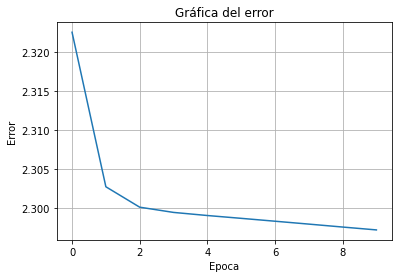

In [ ]:
random.seed(2023)
model_ann = train_data(num_epochs, model_ann, loaders) # cuando se manda a entrenar
# es más lento porque se agregaron  2 capas ocultas y la 3era capa

In [ ]:
test_model(model_ann) # Mal modelo 
# mucho cuidado con perdida de gradiente al utilizar la función sigmoide y 
# una forma de corregirlo era utilizando la función ReLU

Accuracy en test : 0.12


**OJO:** Se tiene que tener cuidado con la pérdida de gradiente y es por ello que consideramos cambiar de optimizador y función de activación.

## **2.3. RELU + UN mejor optimizador (ANN3)**

<img src="https://codelabs.developers.google.com/static/codelabs/cloud-tensorflow-mnist/img/1abce89f7143a69c.png" alt="Simply Easy Learning" 
         width="300">





In [ ]:
class net_ANN3(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(net_ANN3, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size) # capa lineal, hidden_zise = 500 neuronas
    self.relu = nn.ReLU() # Luego pasa por una ReLu para eliminar todos los valores negativos y quedarme desde un valor 0 hasta un valor "z"
    self.fc2 = nn.Linear(hidden_size, num_classes) # de 500 neuronas me pase al número de clases que en este caso son 10
  
  def forward(self,x): # Aqui se aplica todas la funciones de arriba
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [ ]:
model_ann = net_ANN3(input_size,hidden_size, num_classes) # aqui se genera el modelo
print(model_ann)
model_ann.to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_ann.parameters(), lr=lr) # El nuevo optimizador es Adam, que ajuste los parametros del modelo

net_ANN3(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


epoch 1/10: step:100/600, Loss:0.3422
epoch 1/10: step:200/600, Loss:0.2650
epoch 1/10: step:300/600, Loss:0.2761
epoch 1/10: step:400/600, Loss:0.3030
epoch 1/10: step:500/600, Loss:0.2045
epoch 1/10: step:600/600, Loss:0.1215
epoch 2/10: step:100/600, Loss:0.2233
epoch 2/10: step:200/600, Loss:0.1064
epoch 2/10: step:300/600, Loss:0.1164
epoch 2/10: step:400/600, Loss:0.0591
epoch 2/10: step:500/600, Loss:0.0747
epoch 2/10: step:600/600, Loss:0.0395
epoch 3/10: step:100/600, Loss:0.0568
epoch 3/10: step:200/600, Loss:0.1535
epoch 3/10: step:300/600, Loss:0.0782
epoch 3/10: step:400/600, Loss:0.0601
epoch 3/10: step:500/600, Loss:0.0907
epoch 3/10: step:600/600, Loss:0.0323
epoch 4/10: step:100/600, Loss:0.0504
epoch 4/10: step:200/600, Loss:0.0353
epoch 4/10: step:300/600, Loss:0.1201
epoch 4/10: step:400/600, Loss:0.0306
epoch 4/10: step:500/600, Loss:0.0852
epoch 4/10: step:600/600, Loss:0.0866
epoch 5/10: step:100/600, Loss:0.0659
epoch 5/10: step:200/600, Loss:0.0620
epoch 5/10: 

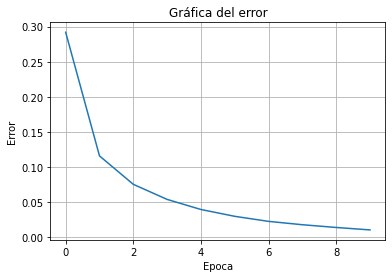

In [ ]:
model_ann = train_data(num_epochs, model_ann, loaders) # y finalmente se manda a entrenar

In [ ]:
test_model(model_ann) 

Accuracy en test : 0.99


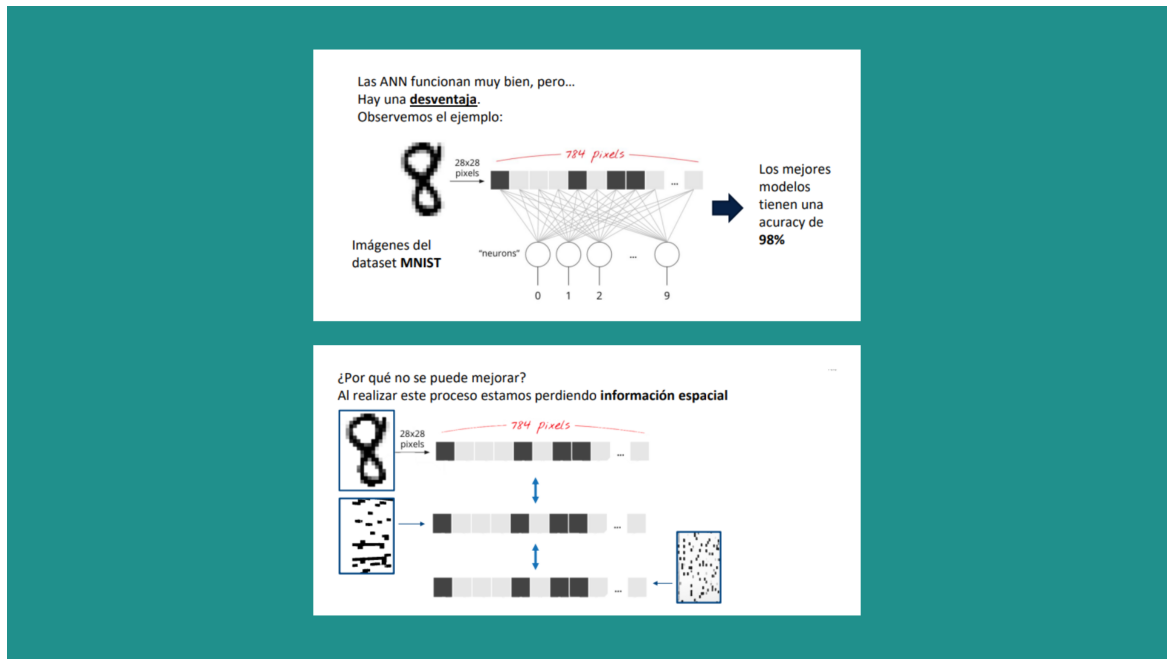

In [ ]:
desventaja_ann= cv2.imread("/content/drive/MyDrive/CLUBS DE APRENDIZAJE/CLUB PYTHON/PYTHON AVANZADO/Materiales Avanzado/Desventaja-ANN.png") # se carga la imagen 
desventaja_ann = cv2.cvtColor(desventaja_ann, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(22,12))
plt.axis('off')
plt.imshow(desventaja_ann)
plt.show()

## **2.2. MODELO CNN**

In [ ]:
#@title 2.2.1. Definición de funciones de filtros
def gaussian1d(sigma, mean, x, ord): # Genera filtros gaussianos
    x = np.array(x)
    x_ = x - mean
    var = sigma**2

    # Gaussian Function
    g1 = (1/np.sqrt(2*np.pi*var))*(np.exp((-1*x_*x_)/(2*var)))
    
    if ord == 0:
        g = g1
        return g
    elif ord == 1:
        g = -g1*((x_)/(var))
        return g
    else:
        g = g1*(((x_*x_) - var)/(var**2))
        return g
def gaussian2d(sup, scales):
    var = scales * scales
    shape = (sup,sup)
    n,m = [(i - 1)/2 for i in shape]
    x,y = np.ogrid[-m:m+1,-n:n+1]
    g = (1/np.sqrt(2*np.pi*var))*np.exp( -(x*x + y*y) / (2*var) )
    return g
def log2d(sup, scales):
    var = scales * scales
    shape = (sup,sup)
    n,m = [(i - 1)/2 for i in shape]
    x,y = np.ogrid[-m:m+1,-n:n+1]
    g = (1/np.sqrt(2*np.pi*var))*np.exp( -(x*x + y*y) / (2*var) )
    h = g*((x*x + y*y) - var)/(var**2)
    return h
def makefilter(scale, phasex, phasey, pts, sup): #esta es una función para generar los filtros
    
    #se está haciendo un ajuste gaussiano unidimensional tanto en gx como en gy
    gx = gaussian1d(3*scale, 0, pts[0,...], phasex)
    gy = gaussian1d(scale,   0, pts[1,...], phasey)

    image = gx*gy #al multiplicar generamos un efecto especial por imagen

    image = np.reshape(image,(sup,sup)) #se está haciendo una copia con la forma deseada
    return image #visualizamos la imagen
def makeLMfilters():
    sup     = 49
    scalex  = np.sqrt(2) * np.array([1,2,3]) # es un vector de numeros
    norient = 6
    nrotinv = 12

    nbar  = len(scalex)*norient
    nedge = len(scalex)*norient
    nf    = nbar+nedge+nrotinv  #valor
    F     = np.zeros([sup,sup,nf]) #Se genera una matriz de tres dimensiones sup x sup x nf
    hsup  = (sup - 1)/2

    x = [np.arange(-hsup,hsup+1)]
    y = [np.arange(-hsup,hsup+1)]

    [x,y] = np.meshgrid(x,y) #Devuelve coordenadas de cuadrícula 2D basadas en las coordenadas que contienen los vectores x e y.

    orgpts = [x.flatten(), y.flatten()]
    orgpts = np.array(orgpts) # Devuelve una copia de la matriz transformada a una dimensión.
    
    count = 0
    for scale in range(len(scalex)):
        for orient in range(norient):
            angle = (np.pi * orient)/norient
            c = np.cos(angle)
            s = np.sin(angle)
            rotpts = [[c+0,-s+0],[s+0,c+0]]
            rotpts = np.array(rotpts)
            rotpts = np.dot(rotpts,orgpts)
            F[:,:,count] = makefilter(scalex[scale], 0, 1, rotpts, sup)
            F[:,:,count+nedge] = makefilter(scalex[scale], 0, 2, rotpts, sup)
            count = count + 1
            
    count = nbar+nedge
    scales = np.sqrt(2) * np.array([1,2,3,4])
    
    for i in range(len(scales)):
        F[:,:,count]   = gaussian2d(sup, scales[i])
        count = count + 1
        
    for i in range(len(scales)):
        F[:,:,count] = log2d(sup, scales[i])
        count = count + 1
        
    for i in range(len(scales)):
        F[:,:,count] = log2d(sup, 3*scales[i])
        count = count + 1
        
    return F

In [ ]:
F = makeLMfilters() # 48 filtros de tamaño 49x49

**Filtro gaussiano derivado de primer orden**

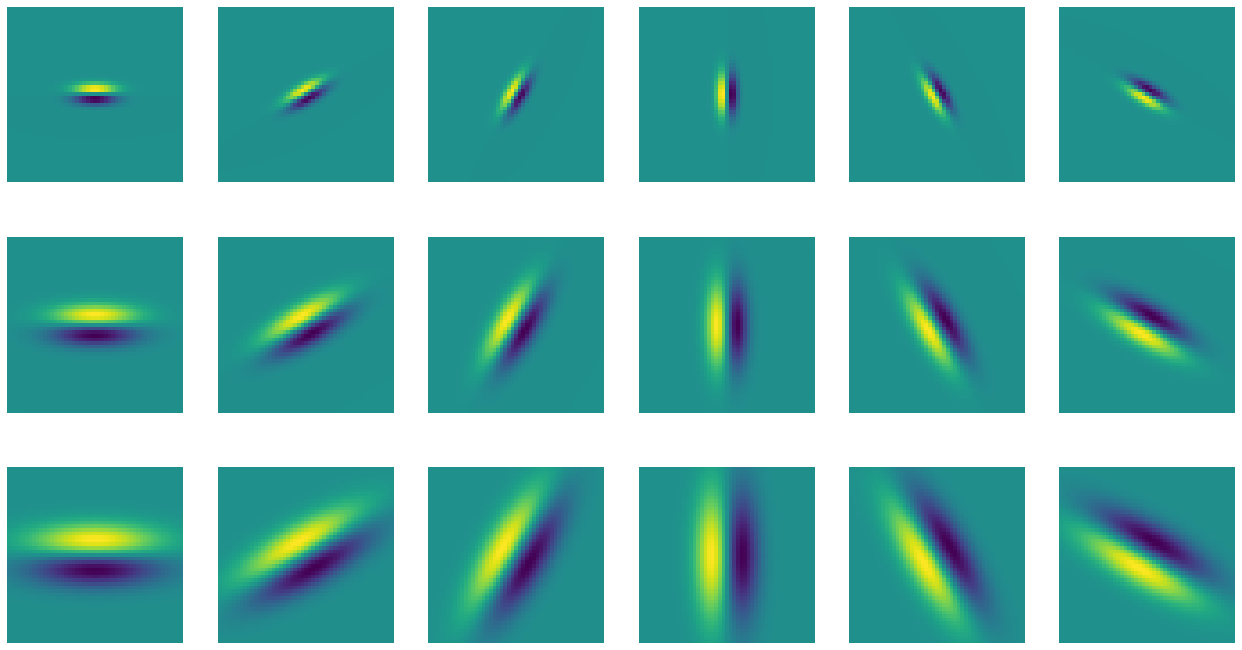

In [ ]:
plt.figure(figsize=(22,12))
for i in range(0,18):
    plt.subplot(3,6,i+1)
    plt.axis('off')
    plt.imshow(F[:,:,i]) # , cmap = 'gray'

**Filtro gaussiano derivado del segundo orden**

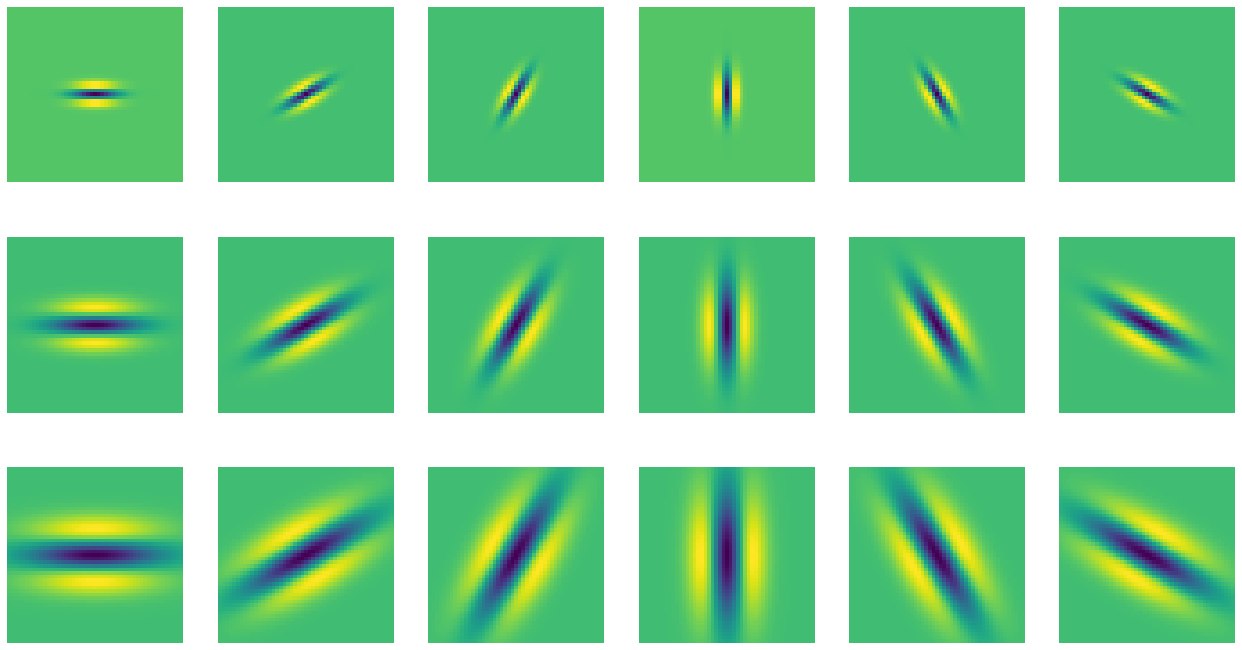

In [ ]:
plt.figure(figsize=(22,12))
for i in range(0,18):
    plt.subplot(3,6,i+1)
    plt.axis('off')
    plt.imshow(F[:,:,i+18])

**Filtro Gaussiano y Laplaciano**


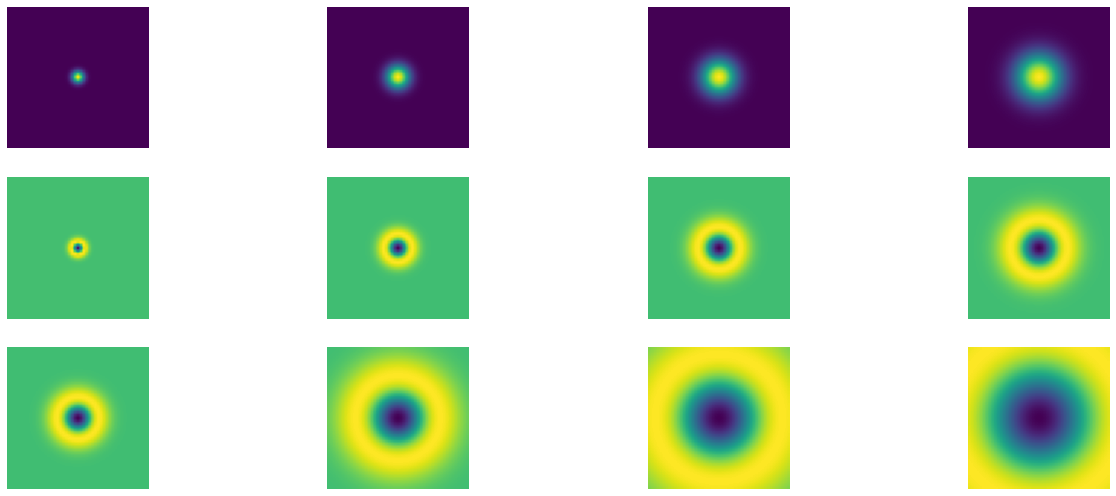

In [ ]:
plt.figure(figsize=(22,12))
for i in range(0,12):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.imshow(F[:,:,i+36]) # , cmap = 'gray'

**Aplicando los filtros**

In [ ]:
def mostrar(img, txt):
  plt.axis('off')
  plt.imshow(img)
  plt.title(txt)
  plt.show()

In [ ]:
def applyFilters(im, kernels): # Función de aplicar filtros (parametro de imagen y los kernels)
    im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) # Se pasa la imagen a escala grises para tener un mejor efecto
    plt.figure(figsize=(60,80)) # y despues se genera una paleta de dibujo (especie de capas)
    for i in range(48): # para que recorra en los 48 filtros
      img_conv = cv2.filter2D(im, -1, F[:,:,i]) # tupla de tamaño 3 (F[,,])
      img_conv = np.maximum(img_conv, 0) # esta demás esa función
      plt.subplot(6,8,i+1) # 
      plt.axis('off')
      plt.imshow(img_conv)

# cv2.filter2D : Permite aplicarle un filtro convolucional a mi imagen, ya aplica un ReLU interno

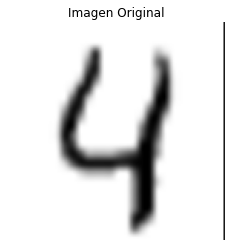

In [ ]:
img = cv2.imread("/content/drive/MyDrive/CLUBS DE APRENDIZAJE/CLUB PYTHON/PYTHON AVANZADO/Materiales Avanzado/digit-4.png") # se carga la imagen original

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mostrar(img, "Imagen Original")

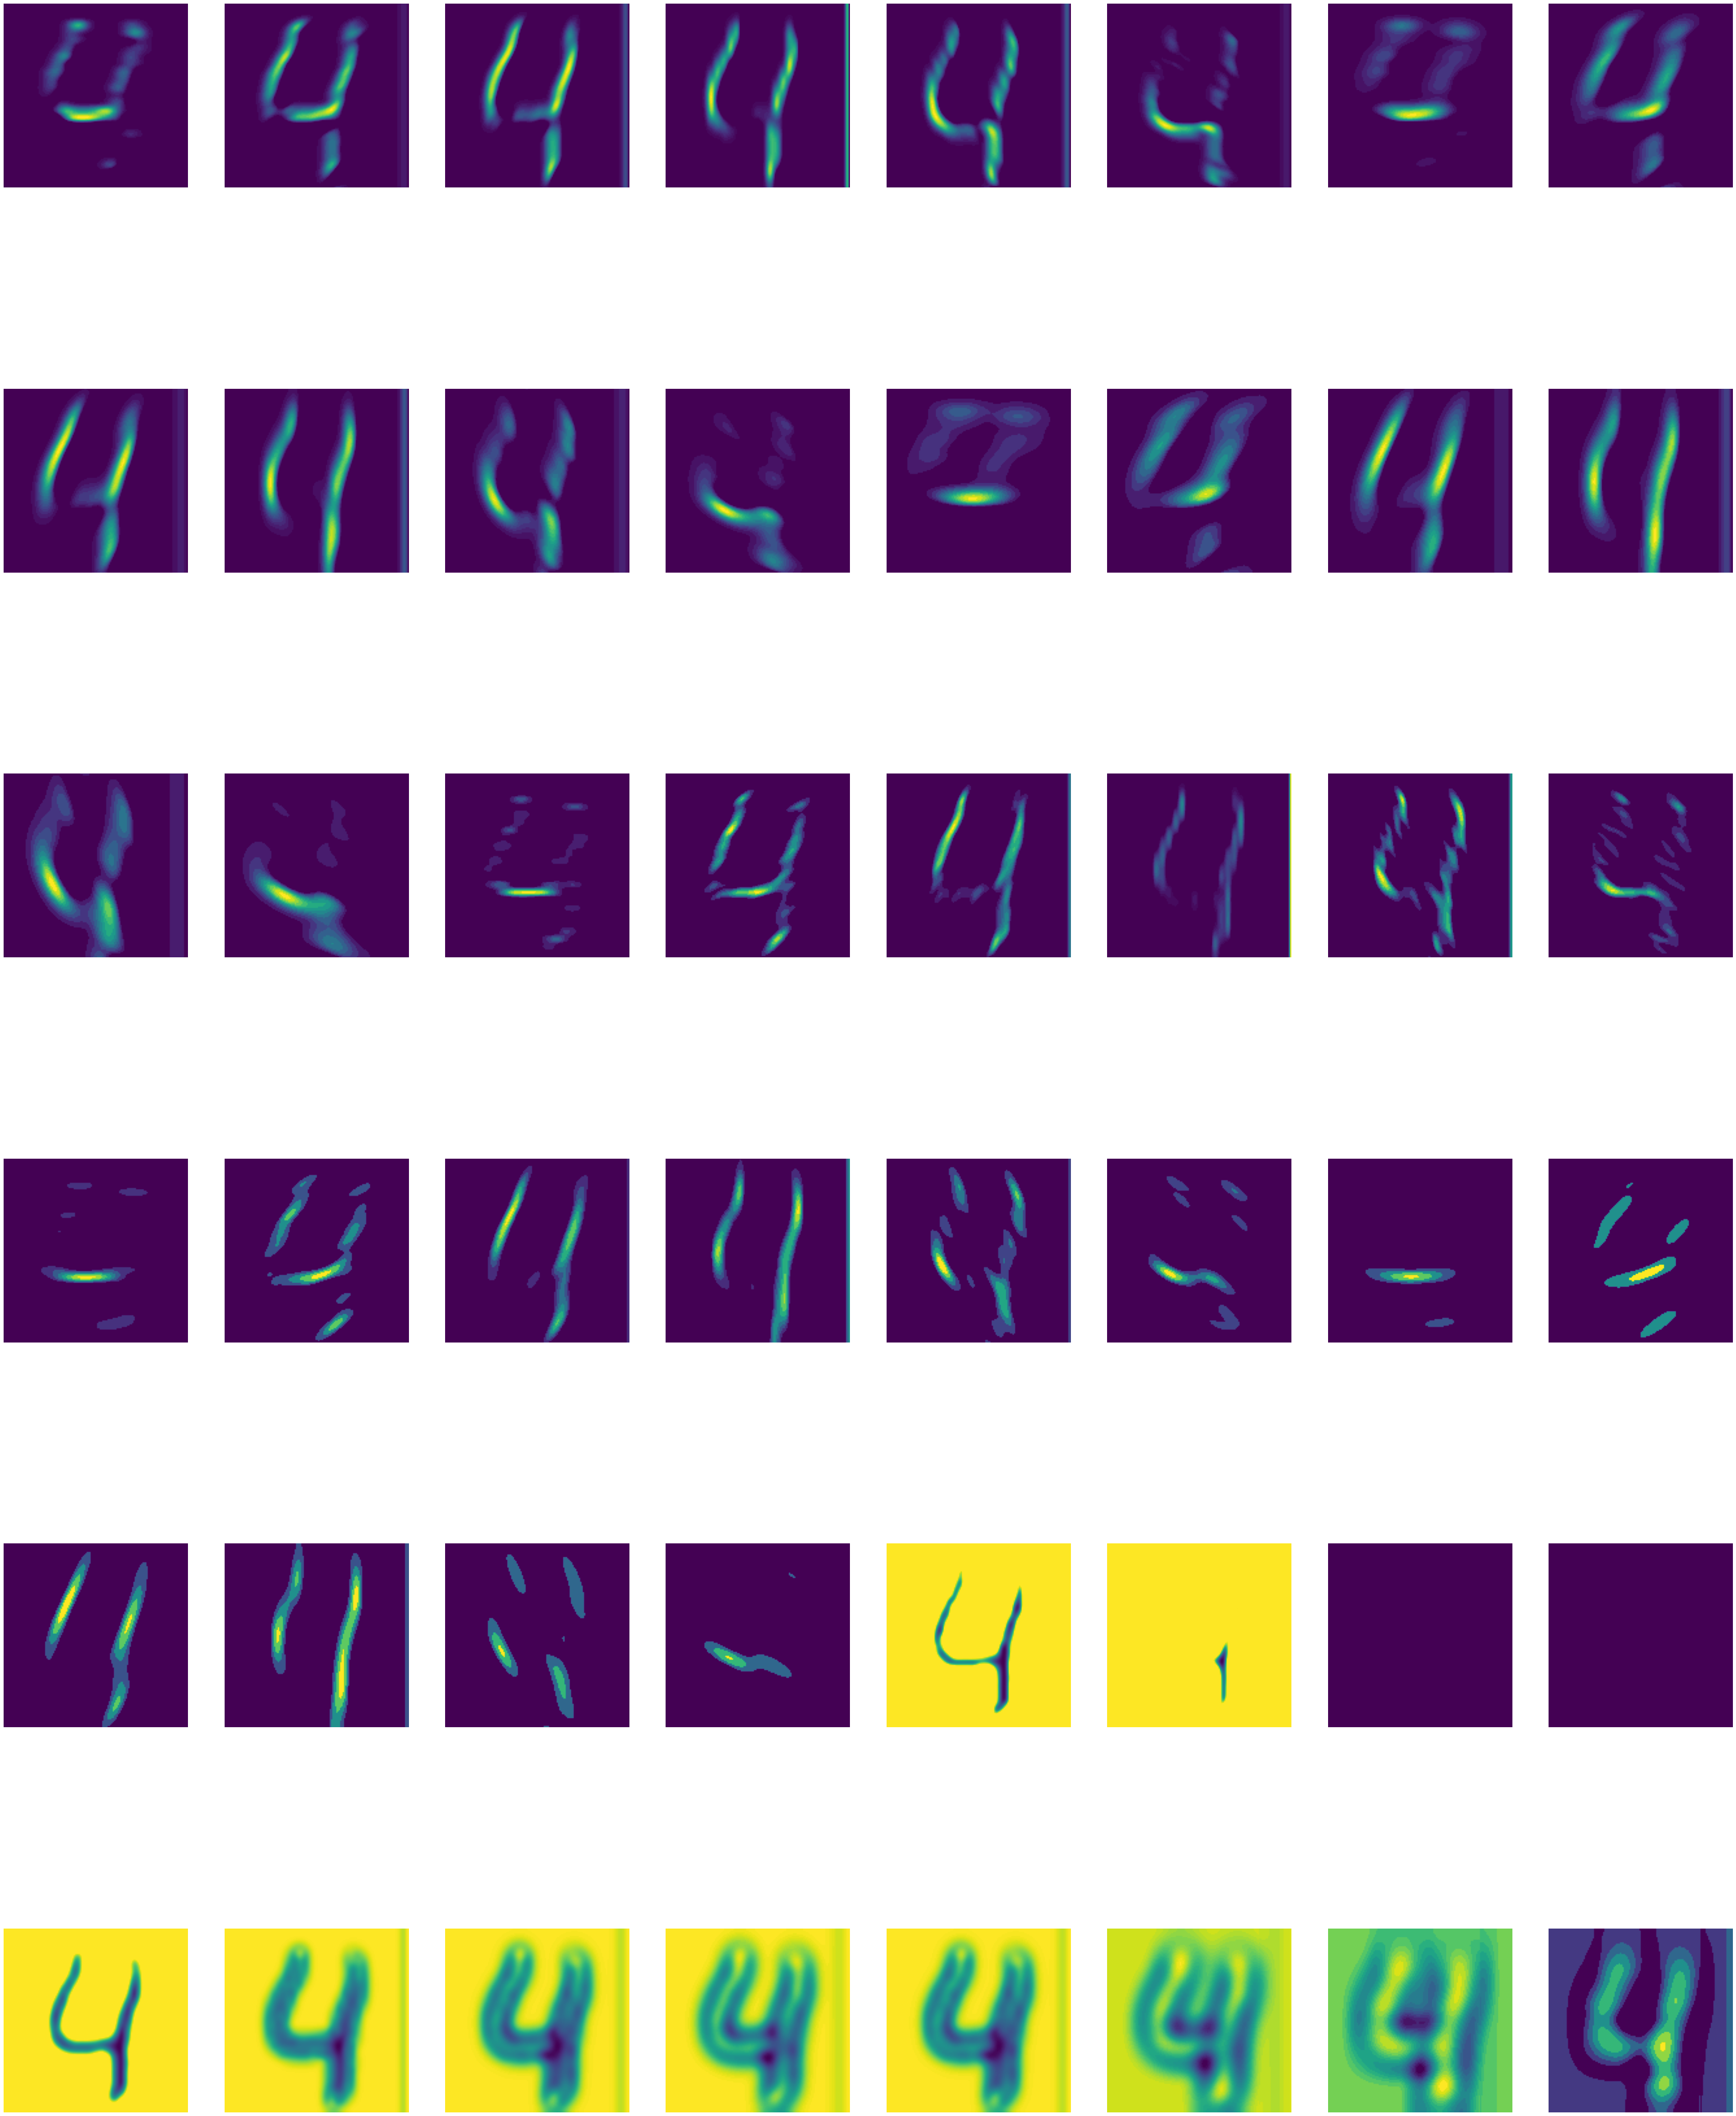

In [ ]:
applyFilters(img, F) # Ahora le esta aplicando los 48 filtros a la imagen y a
# la vez se esta graficando

### **2.2.2. Pooling o submuestreo**

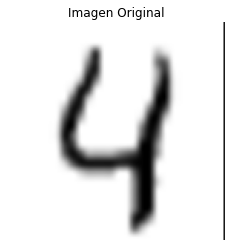

In [ ]:
mostrar(img, "Imagen Original")  #visualizamos la imagen original

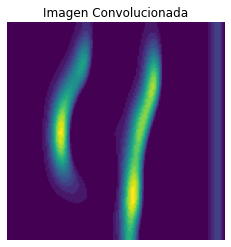

(142, 142)


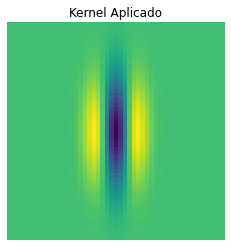

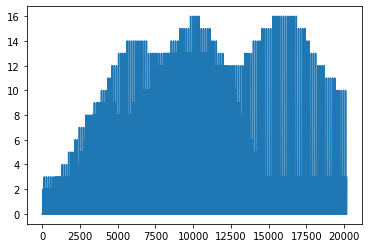

In [ ]:
im = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #cargamos la imagen y la pasamos a escala de grises
img_conv = cv2.filter2D(im, -1, F[:,:,15]) #le aplicamos el filtro 15 de los 48 que tenemos, de modo que
# obtenemos una imagen convolucionada, además cv2.filter2D, cancela los valores negativos y lo deja en cero (ReLU)

mostrar(img_conv, "Imagen Convolucionada") #mostramos la imagen convolucionada
print(img_conv.shape)

mostrar(F[:,:,27], "Kernel Aplicado") #también mostramos el kernel aplicado

#ploteamos los valores de la imagen convolucionada
plt.plot(np.arange(img_conv.size), img_conv.reshape(img_conv.size))
plt.show()

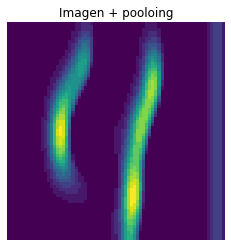

(71, 71)


In [ ]:
import skimage.measure as sm #importamos la libreria skimage.measure como sm

#Aplicamos la función sm.block_reduce, pertenece a la libreria sm, que reduce en bloques, de 2x2, 
# la imagen convolucionada y que se quede con el valor máximo dentro de ese bloque
img_pool = sm.block_reduce(img_conv, (2,2), np.max)

mostrar(img_pool, "Imagen + pooloing")
print(img_pool.shape) #imprimiendo al final una imagen convolucionada de dimensiones más reducidas

**Definiendo funciones de entrenamiento y pruebas**

In [ ]:
def train_data_CNN(num_epochs, model, loaders): # nro de epocas, modelo, cargadores
  model.train()
  t_steps = len(loaders["train"])
  errors  = []
  
  for epoch in range(num_epochs):
    errs = 0
    for i ,(images,labels) in enumerate(loaders["train"]):
      images = Variable(images).to(device) # Se diferencia en esta linea del ANN
      #                (mages.view(-1,28*28)).to(device) -> se hacía el 
      # aplanamiento de la imagen 784px
      labels = Variable(labels).to(device) # etiquetas
      outputs = model(images)  # probabilidades 
      loss = loss_func(outputs, labels) # entropía cruzada 
      optimizer.zero_grad() # Para limpiar las gradientes
      loss.backward() # backpropation para encontrar las penalizaciones de cada neurona
      optimizer.step() # ajuste de los pesos
      errs +=loss.item() # se guarda el error
      if (i+1) % 100 == 0:
        print(f"epoch {epoch+1}/{num_epochs}: step:{i+1}/{t_steps}, Loss:{loss.item():.4f}")
    errors.append(errs/t_steps)
  plt.plot(errors)
  plt.title("Gráfica del error")
  plt.xlabel("Epoca")
  plt.ylabel("Error")
  plt.grid()
  plt.show()
  return model

In [ ]:
def test_model_CNN(model):
  model.eval()
  with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in loaders["test"]:
       images = images.to(device)# Ahora se conserva la imagen bidimensional
       labels = labels.to(device)
       test_out = model(images)
       y_pred = torch.max(test_out, 1)[1].data.squeeze()
       accuracy = (y_pred==labels).sum().item() / labels.size(0)
    print(f"Accuracy en test : {accuracy}") 

**Estructura del Modelo CNN**

Para este ejemplo se realizara una arquitectura desde cero (from scratch)

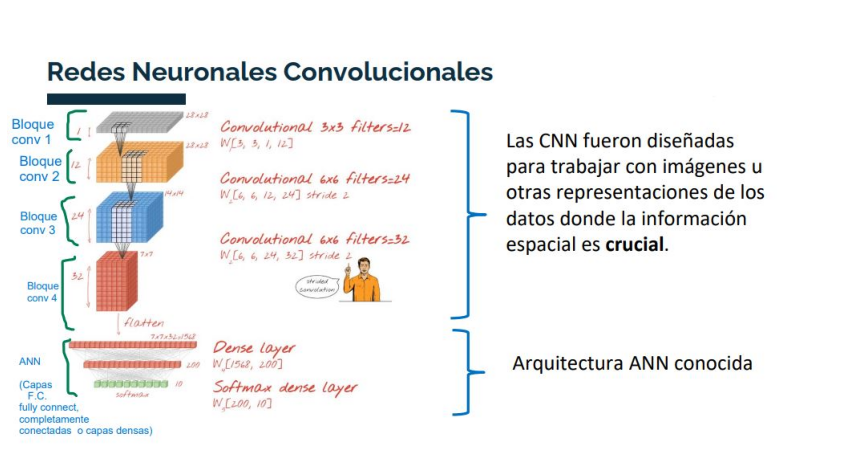

In [ ]:
bloque= cv2.imread("/content/drive/MyDrive/CLUBS DE APRENDIZAJE/CLUB PYTHON/PYTHON AVANZADO/Materiales Avanzado/Bloques convolucionales.JPG") 
bloque = cv2.cvtColor(bloque, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,12))
plt.axis('off')
plt.imshow(bloque)
plt.show()

In [ ]:
class net_CNN(nn.Module): # propio de pytorch
  def __init__(self): # constructor 
    super(net_CNN, self).__init__()

    ## creando arquitectura desde cero
    self.conv1 = nn.Sequential( # Convolución 1
       nn.Conv2d( # convolucion bidimensional
           in_channels=1,     # dimension de la imagen RGB = 3, escala de grises = 1
           # el número de canales de entrada es 1 porque no tienen profundidad (RGB) ya que no es una imagen a colores
           out_channels=16,   # numero de filtros (kernels), nro de canales 
           kernel_size=5,     # tamaño del filtro (5x5)
           stride=1,          # valor de desplazamiento
           padding=2          # valor de relleno a los extremos para que el 
           # kernel pueda posicionarse en la imagen
       ),
       nn.ReLU(), # Para eliminar los valores negativos 
       nn.MaxPool2d(kernel_size=2) # pooling max de 2x2 
    )
    self.conv2 = nn.Sequential( # convolución 2 
       nn.Conv2d(16, 32, 5, 1, 2), # profundidad de 16 porque son de los
       # 16 filtros del bloque anterior
       # 32 filtros de tamaño 5x5 
       # stride = 1
       # padding = 2
       nn.ReLU(), # ReLU
       nn.MaxPool2d(2) # Max pooling 2d
    )

    self.fc = nn.Linear(32 * 7 * 7, 10) # Capa lineal , se va a aplanar el
    # bloque de 7x7x32 en una salida de 10 neuronas 

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = x.view(x.size(0), -1) # se vuelve un vector 1d, para aplnar el modelo
    output = self.fc(x) # y por último se aplica el fc

    return output

Ahora se va a generar el modelo:

In [ ]:
model_cnn = net_CNN()
print(model_cnn)
model_cnn.to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_cnn.parameters(), lr=lr)

net_CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)


Para posteriormente mandarlo a entrenar.

epoch 1/10: step:100/600, Loss:0.2064
epoch 1/10: step:200/600, Loss:0.1859
epoch 1/10: step:300/600, Loss:0.2001
epoch 1/10: step:400/600, Loss:0.1188
epoch 1/10: step:500/600, Loss:0.0798
epoch 1/10: step:600/600, Loss:0.1126
epoch 2/10: step:100/600, Loss:0.0462
epoch 2/10: step:200/600, Loss:0.1105
epoch 2/10: step:300/600, Loss:0.0211
epoch 2/10: step:400/600, Loss:0.0911
epoch 2/10: step:500/600, Loss:0.1177
epoch 2/10: step:600/600, Loss:0.0585
epoch 3/10: step:100/600, Loss:0.0498
epoch 3/10: step:200/600, Loss:0.0265
epoch 3/10: step:300/600, Loss:0.0763
epoch 3/10: step:400/600, Loss:0.0280
epoch 3/10: step:500/600, Loss:0.0113
epoch 3/10: step:600/600, Loss:0.0179
epoch 4/10: step:100/600, Loss:0.0749
epoch 4/10: step:200/600, Loss:0.0132
epoch 4/10: step:300/600, Loss:0.0349
epoch 4/10: step:400/600, Loss:0.0045
epoch 4/10: step:500/600, Loss:0.0128
epoch 4/10: step:600/600, Loss:0.0356
epoch 5/10: step:100/600, Loss:0.0305
epoch 5/10: step:200/600, Loss:0.0753
epoch 5/10: 

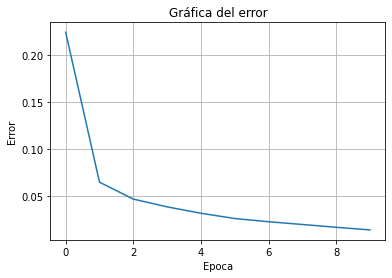

In [ ]:
model_cnn = train_data_CNN(num_epochs, model_cnn, loaders)

Se llego a un 100% de accuracy en los datos de prueba.

Se superó el modelo ANN3 anterior (modelo aplanado o lineal) comparado a un modelo de convolución.

In [ ]:
test_model_CNN(model_cnn)

Accuracy en test : 1.0


## **Resultados**

---




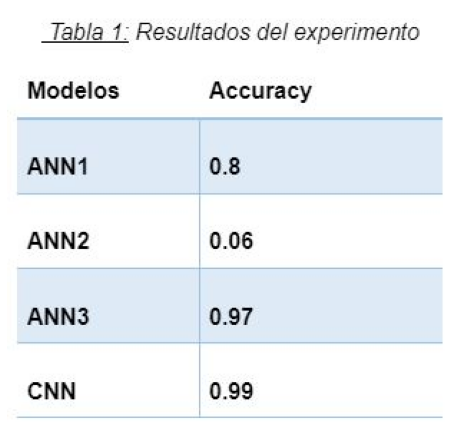

In [ ]:
tabla= cv2.imread("/content/Tabla de resultados2.JPG") 
tabla = cv2.cvtColor(tabla, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(tabla)
plt.show()

+ El ANN2, pese a tener dos capas más que el ANN1 es menos efectiva que ella, solo acierta en clasificar 6 de cada 100 dígitos, esto quiere decir que el modelo no es bueno. El gran error que tiene el modelo se debe a la función de activación sigmoide. Esta función convierte cada entrada en un rango de 0 a 1 y lo vuelve hacer en cada capa; como consecuencia los pesos van tendiendo a ser próximos a cero, además el error disminuye demasiado lento.

+ En el ANN3, se observa un error relativamente bajo desde un inicio (Loss: 0.3251), y se encontró un accuracy de 0.97, esto indica que el modelo acierta en clasificar 97 de cada 100 dígitos. 

+ De entre todas las redes neuronales artificiales, ANN, las que tienen menor margen de error son las ANN1 y ANN3. De entre estas dos, la ANN3 tiene un mayor accuracy, es superior debido a que utiliza una red neuronal con un mayor número de capas, 2 a 1.

+ El CNN a diferencia de los modelos anteriores tiene más matices en su función de modelamiento. Las dos convoluciones nos ayudan a resaltar los patrones encontrados, minimizamos los errores en cada iteración con la función de gradiente y se penalizan las predicciones con la entropía cruzada. Esto nos permite obtener un mejor modelamiento y en consecuencia un mejor accuracy (0.99).

+ Podemos ver, basándonos en los resultados, que de entre todos los ANN, el que posee un mejor rendimiento, casi tan bueno como la CNN es el ANN3. Sin embargo, la CNN sigue siendo superior, por lo cual, las convoluciones representan mejor los patrones espaciales a diferencia de los ANN.



## **Conclusiones**

---

+ Se diseñó y entrenó una red neuronal convolucional usando el lenguaje de programación Python en el IDE de Google Colab, paquete Pytorch para la clasificación de imágenes digitalizadas de manera óptima.

+ Se encontró de manera efectiva el filtro de convolución o kernel más adecuado para el mapa de características de una imagen.

+ La aplicación de la función de rectificación-ReLU en donde se eliminarón las muestras negativas de los mapas de características anteriores fue efectiva, lográndo crear un mapa con valores positivos más próximos al filtro asociado.

+ Se aplicó la capa Pooling, obteniendo una imagen de menor tamaño que tiene menos ruido y características mejor definidas, como los bordes.

+ Se empleó la función de error de entropía cruzada, logrando la clasificación de imágenes en el ajuste de las redes neuronales. 

+ Se implementó el descenso de gradiente (retropropagación) para regularizar el modelo penalizando los errores (el error estimado sea el menor posible) y para retroalimentar el sistema.
